In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import data
df=pd.read_excel(r"C:\Users\ADMIN\Downloads\Sample - Superstore.xls",header=0)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [8]:
furniture=df[df["Category"]=="Furniture"]
furniture.shape

(2121, 21)

In [9]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [14]:
# furniture["Order Date"]=pd.to_datetime(furniture["Order Date"])

In [17]:
furniture["Order Date"].min(),furniture["Order Date"].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [16]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [18]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


In [19]:
#sorting the data in chronological order.
furniture=furniture.sort_values("Order Date",ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [21]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [23]:
furniture["Order Date"].value_counts()
#decide whether or not group by is needed....

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [25]:
furniture=furniture.groupby("Order Date")["Sales"].sum().reset_index()#grouping repetative entries to get single values for each date.
furniture.shape

(889, 2)

In [27]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [28]:
furniture=furniture.set_index('Order Date')

In [29]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [30]:
y=furniture["Sales"].resample("W").mean()

In [33]:
print(y.shape)
y

(208,)


Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

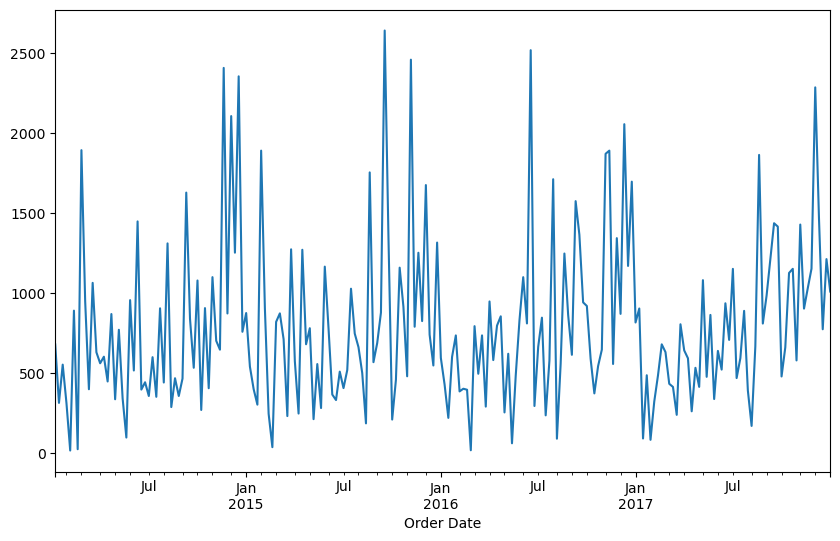

In [32]:
y.plot(figsize=(10,6))
plt.show()

In [35]:
furniture.shape

(889, 1)

In [36]:
y=furniture["Sales"].resample("M").mean

In [37]:
print(y.shape)

(48,)


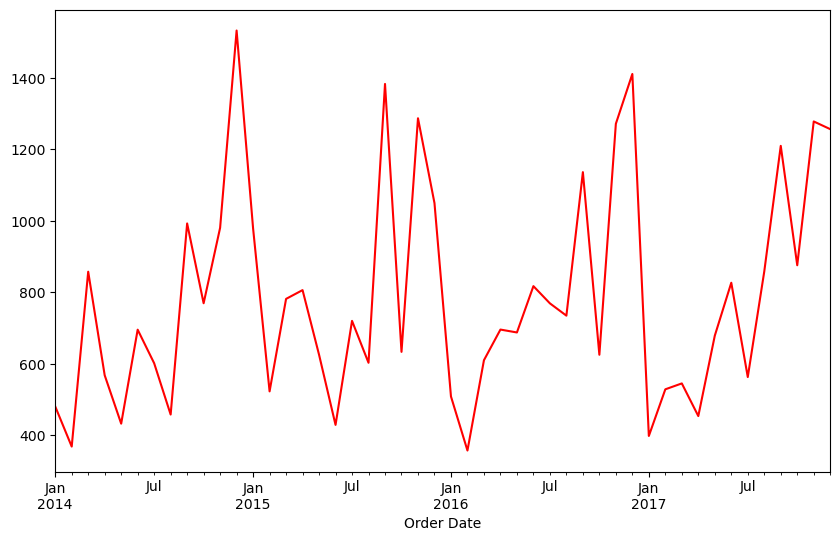

In [43]:
y.plot(figsize=(10,6),c="Red")
plt.show()

In [44]:
train=y.loc[:"2016-12-31"]
#train=y.iloc[0:36]
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [46]:
test=y.loc["2017-01-31":]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

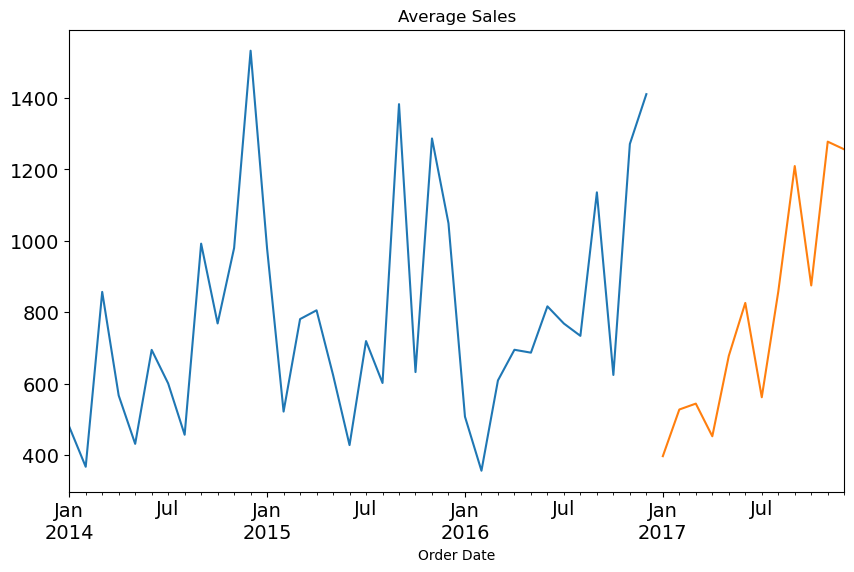

In [50]:
#plotting data
train.plot(figsize=(10,6),title="Average Sales",fontsize=14)
test.plot(figsize=(10,6),title="Average Sales",fontsize=14)
plt.show()
